<img src="/content/tl-logo-cf3f70e8f5222649e6b06468adfae64c.png">

<h2>Hugh Huyton:</h2>


<p> This exam will test your knowledge in Artificial Intelligence. </p>
<p> We will test the following: </p>

- Logistic Regressions
- Neural Networks
- Monte Carlo Simulation

# Question 1:
Below is the code to import a standard dataset with breast cancer.
When you run the cell, you will have it stored as the object "data",
and the description of the dataset is printed out for you.

### Your task is to create two models for classifying the diagnosis, and compare the accuracy metrics for the two:
### 1. a) Logistic Regression: 
"sklearn.linear_model" offers good logit classifiers. Because the dataset is fairly small (~500 rows), we suggest that you use the "liblinear" solver for fitting the logit classifier.

Split the dataset into a test and training (30% test / 70% training) dataset and train the model on the training dataset. Then, classify the test dataset, and compute the accuracy, which you can print as an output.

P.S.: We do not expect you to regularize for type 1 or type 2 errors. Your goal is to build models that classify well the diagnosis. Also, we do not expect you to spend hours on feature engineering and/or other things that may or may not improve testing accuracy. A good answer shall just contain a sensible model and the testing accuracy.

In [81]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
data = datasets.load_breast_cancer()
print(np.shape(data.data))

(569, 30)


In [82]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [83]:
df1 = pd.DataFrame(data['data'])
df2 = pd.DataFrame(data['target'])
df = pd.concat([df1, df2], axis=1)
df.columns = list(data.feature_names)+ ['target']

In [84]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [85]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [86]:
train, test = train_test_split(df, test_size = 0.3, random_state=42)
print(train.shape, test.shape)

(398, 31) (171, 31)


In [87]:
train_X = train.loc[:, train.columns != 'target']
train_y= train['target']
test_X= test.loc[:, train.columns != 'target']
test_y = test['target']

In [88]:
model = LogisticRegression(solver = 'liblinear').fit(train_X, train_y)

In [89]:
model.predict(test_X)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [90]:
model.score(test_X, test_y)

0.9649122807017544

# Print the logit accuracy below:

In [91]:
logitacc = "0.96"
print(f"\ntesting set accuracy with logit is: {logitacc}")


testing set accuracy with logit is: 0.96


### 1. b) Feedforward Neural Network:
So far, so good. Let's see how a feedforward neural network does for the same task.

Take the same train/test split as in a), and construct the following neural network, which you fit to the data:

In [92]:
import pickle
from keras import models
pickle.loads(b'\x80\x03]q\x00(X\x15\x00\x00\x00Model: "sequential_2"q\x01XA\x00\x00\x00_________________________________________________________________q\x02XA\x00\x00\x00Layer (type)                 Output Shape              Param #   q\x03XA\x00\x00\x00=================================================================q\x04XA\x00\x00\x00dense_5 (Dense)              (None, 30)                930       q\x05XA\x00\x00\x00_________________________________________________________________q\x06XA\x00\x00\x00dense_6 (Dense)              (None, 50)                1550      q\x07XA\x00\x00\x00_________________________________________________________________q\x08XA\x00\x00\x00dense_7 (Dense)              (None, 30)                1530      q\tXA\x00\x00\x00_________________________________________________________________q\nXA\x00\x00\x00dense_8 (Dense)              (None, 1)                 31        q\x0bXA\x00\x00\x00=================================================================q\x0cX\x13\x00\x00\x00Total params: 4,041q\rX\x17\x00\x00\x00Trainable params: 4,041q\x0eX\x17\x00\x00\x00Non-trainable params: 0q\x0fXA\x00\x00\x00_________________________________________________________________q\x10e.')

['Model: "sequential_2"',
 '_________________________________________________________________',
 'Layer (type)                 Output Shape              Param #   ',
 '=================================================================',
 'dense_5 (Dense)              (None, 30)                930       ',
 '_________________________________________________________________',
 'dense_6 (Dense)              (None, 50)                1550      ',
 '_________________________________________________________________',
 'dense_7 (Dense)              (None, 30)                1530      ',
 '_________________________________________________________________',
 'dense_8 (Dense)              (None, 1)                 31        ',
 '=================================================================',
 'Total params: 4,041',
 'Trainable params: 4,041',
 'Non-trainable params: 0',
 '_________________________________________________________________']

### You can use the library keras to contruct the ANN. Since we are dealing with a classification problem, we recommend binary_crossentropy as a loss function.
Choose a reasonable batch size and epoch count and train the model.
### Here again, print the testing dataset accuracy:

In [93]:
from keras.models import Sequential
from keras.layers import Dense


In [94]:
model = Sequential(name = 'sequential_2')
model.add(Dense(30, input_dim=30, activation='relu', name='dense_5'))
model.add(Dense(50, activation='relu', name='dense_6'))
model.add(Dense(30, activation='relu', name='dense_7'))
model.add(Dense(1, activation='sigmoid', name='dense_8'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 4,041
Trainable params: 4,041
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=15, batch_size=64)

Epoch 1/15
7/7 [==============================] - 1s 3ms/step - loss: 2.3173 - accuracy: 0.6868
Epoch 2/15
7/7 [==============================] - 0s 3ms/step - loss: 1.0496 - accuracy: 0.7997
Epoch 3/15
7/7 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.7163
Epoch 4/15
7/7 [==============================] - 0s 3ms/step - loss: 0.5616 - accuracy: 0.8643
Epoch 5/15
7/7 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8313
Epoch 6/15
7/7 [==============================] - 0s 4ms/step - loss: 0.4030 - accuracy: 0.8850
Epoch 7/15
7/7 [==============================] - 0s 3ms/step - loss: 0.2616 - accuracy: 0.8884
Epoch 8/15
7/7 [==============================] - 0s 4ms/step - loss: 0.3331 - accuracy: 0.8937
Epoch 9/15
7/7 [==============================] - 0s 4ms/step - loss: 0.2489 - accuracy: 0.9135
Epoch 10/15
7/7 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.8906
Epoch 11/15
7/7 [======================

In [106]:
_, accuracy = model.evaluate(test_X, test_y)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9591
Accuracy: 95.91


In [107]:
ANNacc = "95.91"
print(f"\ntesting set accuracy with logit is: {ANNacc}")


testing set accuracy with logit is: 95.91


### 1. c) Compare the performance of the neural net with the logit. Which one seems better at the job and why might that be?
Please also comment on which model you would choose to implement in a case like this and why.

In [98]:
'''
In practice, a neural network model for binary classification can be worse than a logistic regression model because neural networks are more difficult to train and are more prone to overfitting than logistic regression. What's more, ANN's usually require far more instances of data in order for them to perform well, whereas in this example the dataset is fairly small (~500 rows).
'''

"\nIn practice, a neural network model for binary classification can be worse than a logistic regression model because neural networks are more difficult to train and are more prone to overfitting than logistic regression. What's more, ANN's usually require far more instances of data in order for them to perform well, whereas in this example the dataset is fairly small (~500 rows).\n"

# Question 2:
### Your coding skills have gained you a job as an options trader at a successful hedge fund! Congratulations!!

At the first day, your boss comes to you and asks you, whether he should buy a _call option_* with a certain set of characteristics for 1€.

    *A call option gives you the right (but not obligation) to buy a share for a certain strike price. In other words, if the stock price is higher than the strike price, you get the difference, otherwise, you get 0: 
    
    callpayoff = max(stockprice - strikeprice, 0) 

To price the option, you shall build a monte-carlo simulator which generatates _1 000 000_ random walks, each representing the stock price in one year, which is when the option can be expired. By taking the average of these payouts, you will get the expected payout at expiry!

Luckily, your boss has also given you the characteristics and hints for how the stock price moves: 

The stock price follows a student T distribution with 3 degrees of freedom (the rvs function within the t class from scipy.stats package is a great tool for creating random walks with this distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html  ctrl+f "rvs") 

- The stock price today: 69
- Stock returns follow student T distribution with 3 degrees of freedom
- drift of 10% per year 
- volatility of 20%
- strike price of the option is 96

### Build a function that returns the price of the call option, and shows your boss what payout he can expect from the option in order to explain him, whether he should buy it or not.

    P.S.: If you run into trouble on your way, you can always ask for tips from your boss and since he is a nice guy, he will also give a good grade for all attempts!

In [99]:
import matplotlib.pyplot as plt
import statistics as st
from scipy.stats import t

In [100]:
def random_walk(start_price, strike, degrees_freedom, volatility, n):
    
    r = t.rvs(degrees_freedom, size = n, loc = start_price, scale = (volatility * start_price))
    
    return r

In [101]:
def monte_carlo(r):
    results = []
    
    for i in r: 
        p = max((i * (1 + drift) - strike), 0)     
        results.append(p)
    
    plt.hist(r, bins='auto', log = True, histtype = 'step')
    plt.title('Distribution of 1,000,000 Random Walks')
    plt.show()

    return print(f'Expected Payoff: €{round(st.mean(results),2)}\n\nThis represents a 250% return on the price of the call option (€1),\ntherefore he should buy it!')

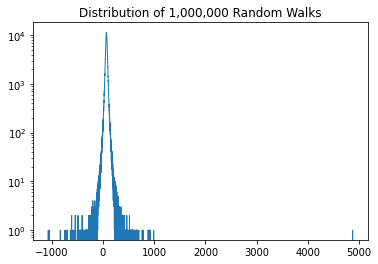

Expected Payoff: €2.51

This represents a 250% return on the price of the call option (€1),
therefore he should buy it!


In [102]:
degrees_freedom = 3
volatility = 0.2
n = 1000000
start_price = 69
strike = 96
drift = 0.1

monte_carlo(random_walk(start_price, strike, degrees_freedom, volatility, n))

# Good luck!

Don't forget: google, github and stack overflow are your best friends!
